<b>ATENÇÃO:</b> a extensão está em ".ipynb", mas o arquivo roda comandos em R!

Dica para usar no R-markdown:

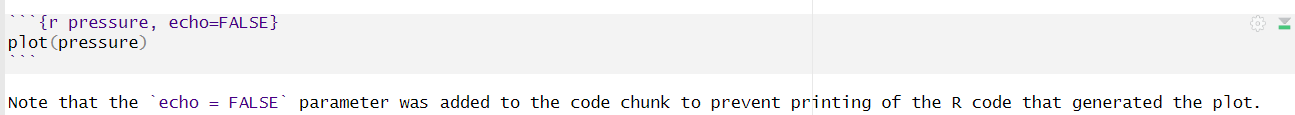

---

Materiais utilizados para a realização do trabalho:

* <b>Artigo:</b> <a href="https://www.nature.com/articles/s41539-024-00245-7#data-availability">Optimizing self-organized study orders: combining refutations and metacognitive prompts improves the use of interleaved practice</a>

* <b>Dados:</b> https://osf.io/6vm7z/?view_only=d9caf564f48b4c4f8166b3c2e38c1cf4

* <b>Dicionário dos dados:</b> https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/U9YSER

---

In [ ]:
# @title Leitura dos dados
url_csv = "https://docs.google.com/spreadsheets/d/1Fv6oRXMtoDKcbS19awogukMpTLr5utXLJ3aw8GXzGbA/export?format=csv&gid=2113233241"
dados = read.csv(file = url_csv, sep=",", header=TRUE)

Ocorreu erro experimental nos dados dos participantes de número $52$ e $69$, e por isso eles possuem valores nulos nas colunas PE_B2 e PE_I2.

#### Setup

In [ ]:
# @title Instalação de pacotes
install.packages("afex")
install.packages("emmeans")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘numDeriv’, ‘doBy’, ‘carData’, ‘abind’, ‘Formula’, ‘quantreg’, ‘plyr’, ‘lme4’, ‘pbkrtest’, ‘lmerTest’, ‘car’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’




In [ ]:
# @title Importação de pacotes
library(afex)
library(emmeans)

Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



##### Transformaçao de dados

In [ ]:
dados_limpos = na.omit(dados)

# Dados transformados para a ANOVA da RQ1
dados_ANOVA_RQ1 = data.frame(
    rep(dados_limpos$DM08_01, 3),
    c(rep('pre-intervention', 89), rep('post-intervention', 89), rep('after a delay', 89)),
    c(dados_limpos$PE_B1, dados_limpos$PE_B2, dados_limpos$PE_B3),
    c(dados_limpos$PE_I1, dados_limpos$PE_I2, dados_limpos$PE_I3),
    rep(dados_limpos$Condition, 3)
)
colnames(dados_ANOVA_RQ1) = c("id", "tempo", "percep_blocked", "percep_interleaved", "condicao")

dados_ANOVA_RQ1_filtro_grupo_intervencao = dados_ANOVA_RQ1[dados_ANOVA_RQ1$condicao == "Full", ]
dados_ANOVA_RQ1_filtro_grupo_controle = dados_ANOVA_RQ1[dados_ANOVA_RQ1$condicao == "Control", ]

#write.csv(dados_ANOVA_RQ1, "dados_ANOVA_RQ1.csv", row.names = FALSE)

#dados_ANOVA_RQ1

In [ ]:
# Dados transformados para a ANOVA da RQ2
dados_ANOVA_RQ2 = data.frame(
    rep(dados$DM08_01, 3),
    c(rep('pre-intervention', 91), rep('post-intervention', 91), rep('after a delay', 91)),
    c(dados$nsw_1, dados$nsw_2, dados$nsw_3),
    c(dados$`sw.1`, dados$`sw.2`, dados$`sw.3`),
    c(dados$PE_B1, dados$PE_B2, dados$PE_B3),
    c(dados$PE_I1, dados$PE_I2, dados$PE_I3),
    rep(dados$Condition, 3)
)
colnames(dados_ANOVA_RQ2) = c("id", "tempo", "numero_trocas",
"proporcao_trocas", "percep_blocked", "percep_interleaved",
"condicao")

In [ ]:
# Dados transformados para o teste t da RQ3 -- permutação

dados_teste_t_perm__RQ3 = data.frame(
    id = dados$DM08_01,
    score_teste_experimental_controlado = dados$test.i + dados$test.b,
    condicao = dados$Condition
)

# Dados transformados para a ANOVA da RQ3
n = nrow(dados)

dados_ANOVA_RQ3 = data.frame(
  id = rep(dados$DM08_01, 2),
  tempo = rep(c("post-intervention", "after a delay"), each = n),
  score_teste_auto_controlado = c(dados$test2, dados$test3),
  precisao = c(dados$dist.post, dados$dist.delay),
  condicao = rep(dados$Condition, 2)
)

dados_ANOVA_RQ3$id = as.factor(dados_ANOVA_RQ3$id)
dados_ANOVA_RQ3$tempo = factor(dados_ANOVA_RQ3$tempo,
                                levels = c("post-intervention", "after a delay"))
dados_ANOVA_RQ3$condicao = as.factor(dados_ANOVA_RQ3$condicao)

## RQ1 - *Good research question 1* - **CONCLUÍDO**


Como a crença dos participantes nas diferentes estratégias de aprendizado (em blocos/intercalada) variou com o tempo e entre as condições?

### `Teste t` para amostras pareadas: crença preexistente

In [ ]:
# RQ1 - Crenças pré existentes

# Percepção efetiva *blocked practice*
PE_B1 = dados$PE_B1

# Média e desvio padrão
c(floor(mean(PE_B1)*100)/100, round(sd(PE_B1), 2))

[1] 4.39 0.85

In [ ]:
# A amostra não passou no teste de normalidade
shapiro.test(PE_B1)
#hist(PE_B1, prob=TRUE)


	Shapiro-Wilk normality test

data:  PE_B1
W = 0.86596, p-value = 1.433e-07


In [ ]:
# Teste não paramétrico PE_B1

media_BS = vector()
sd_BS = vector()
n = 91
for (b in 1:10000){
  amostra = sample(PE_B1, n, replace=TRUE)
  media_BS[b] = mean(amostra)
  sd_BS[b] = sd(amostra)
}
print(mean(media_BS))
print(sd(media_BS))

ic_boot = quantile(media_BS, c(0.025,0.975))
print(ic_boot)

z = 4.39 - 0 / (0.85/sqrt(n))
p_valor = 2 * (1 - pnorm(z))
print(p_valor)

# Rejeitamos a hipótese nula, uma vez que o p-valor é menor de 0,05.

[1] 4.395791
[1] 0.08957032
    2.5%    97.5% 
4.219780 4.571429 
[1] 1.133507e-05


In [ ]:
# Percepção efetiva *interleaved practice*
PE_I1 = dados$PE_I1

# Média e desvio padrão
c(round(mean(PE_I1), 3), round(sd(PE_I1), 2))

[1] 4.00 1.02

In [ ]:
# A amostra não passou no teste de normalidade
shapiro.test(PE_I1)
#hist(PE_I1, prob=TRUE)


	Shapiro-Wilk normality test

data:  PE_I1
W = 0.88318, p-value = 6.869e-07


In [ ]:
# Teste não paramétrico PE_I1

media_BS = vector()
sd_BS = vector()
n = 91
for (b in 1:10000){
  amostra = sample(PE_I1, n, replace=TRUE)
  media_BS[b] = mean(amostra)
  sd_BS[b] = sd(amostra)
}
print(mean(media_BS))
print(sd(media_BS))

ic_boot = quantile(media_BS, c(0.025,0.975))
print(ic_boot)

z = 4 - 0 / (1.02/sqrt(n))
p_valor = 2 * (1 - pnorm(z))
print(p_valor)

# Rejeitamos a hipótese nula, uma vez que o p-valor é menor de 0,05.

[1] 3.999535
[1] 0.1060192
    2.5%    97.5% 
3.791209 4.208791 
[1] 6.334248e-05


In [ ]:
# teste t pareado

# H0: mu(PE_B1) = mu(PE_I1)
# Ha: mu(PE_B1) != mu(PE_I1)
t.test(PE_B1, PE_I1, mu=0, paired=TRUE)


	Paired t-test

data:  PE_B1 and PE_I1
t = 2.3619, df = 90, p-value = 0.02034
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.06285266 0.72835613
sample estimates:
mean difference 
      0.3956044 


Rejeitamos a hipótese nula, devido à obtenção de um **p-valor** ($0.020$) menor que $\alpha = 0.05$.

In [78]:
# Teste de hipótese de duas amostras não paramétrico
# Como ambas as amostras, PE_B1 e PE_I1, não passaram no teste de normalidade,
# será utilizado o método não paramétrico de permutação

# H0: mu(PE_B1) = mu(PE_I1)
# Ha: mu(PE_B1) != mu(PE_I1)

medidas_RQ1 = c(PE_B1, PE_I1)
grupos_RQ1 = c(rep("PE_B1", length(PE_B1)), rep("PE_I1", length(PE_B1)))

# Diferença observada entre as médias
(delta_medias_obs_RQ1 = abs(mean(
    medidas_RQ1[grupos_RQ1=="PE_B1"]) - mean(
        medidas_RQ1[grupos_RQ1=="PE_I1"])))

# Distribuição das médias regida pela hipótese nula (acaso)
delta_medias_permutacao_RQ1 = vector()
for (p in 1:10000)
{
  grupos_perm_RQ1 = sample(grupos_RQ1, length(grupos_RQ1), replace=FALSE)
  delta_medias_permutacao_RQ1[p] = abs(
    mean(medidas_RQ1[grupos_perm_RQ1=="PE_B1"]) - mean(
        medidas_RQ1[grupos_perm_RQ1=="PE_I1"]))
}

# Cálculo do p-valor para o teste de hipóteses
(pvalor_permutacao_RQ1 = 2*mean(
    delta_medias_permutacao_RQ1 >= delta_medias_obs_RQ1))

[1] 0.3956044

[1] 0.012

Pelo uso do teste não paramétrico (permutação), obtemos as mesmas conclusões em relação àquelas obtidas pelo uso inadequado do `teste t` (sem validação da premissa de normalidade):

> Rejeição da hipótese nula, devido à obtenção de um **p-valor** ($0.012$) menor que $\alpha = 0.05$.

### ANOVA: variância ao longo do tempo - usando o pacote `afex`

Como a crença nas diferentes técnicas de estudo variou com o tempo/condição?

#### Criação dos modelos

In [ ]:
# Modelos ANOVA -- os valores nulos foram desconsiderados

# Variáveis preditoras
# tempo ; condicao

# Variáveis resposta
# percep_blocked; percep_interleaved

# Função para rodar ANOVA mista
rodar_anova <- function(dv, dados, between = TRUE) {
  if (between) {
    aov_ez(id = "id", dv = dv, data = dados, within = "tempo", between = "condicao")
  } else {
    aov_ez(id = "id", dv = dv, data = dados, within = "tempo")
  }
}

# Modelos gerais (com fator entre-sujeitos)
modelo_blocked <- rodar_anova("percep_blocked", dados_ANOVA_RQ1)
modelo_interleaved <- rodar_anova("percep_interleaved", dados_ANOVA_RQ1)

# Modelos separados por grupo (sem fator entre-sujeitos)
modelo_blocked_interv <- rodar_anova("percep_blocked", dados_ANOVA_RQ1_filtro_grupo_intervencao, between = FALSE)
modelo_blocked_control <- rodar_anova("percep_blocked", dados_ANOVA_RQ1_filtro_grupo_controle, between = FALSE)

modelo_interleaved_interv <- rodar_anova("percep_interleaved", dados_ANOVA_RQ1_filtro_grupo_intervencao, between = FALSE)
modelo_interleaved_control <- rodar_anova("percep_interleaved", dados_ANOVA_RQ1_filtro_grupo_controle, between = FALSE)

Converting to factor: condicao

Contrasts set to contr.sum for the following variables: condicao

Converting to factor: condicao

Contrasts set to contr.sum for the following variables: condicao



#### Outputs dos modelos

##### Prática de estudos em bloco

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos em bloco

# Tempo: possui efeitosignificativo (p-valor < 0.05)
# Condição: não possui efeito significativo (p-valor > 0.05)
# Interação tempo x condição: possui efeito significativo (p-valor < 0.05)

summary(modelo_blocked)

Anova Table (Type 3 tests)

Response: percep_blocked
          Effect           df  MSE         F  ges p.value
1       condicao        1, 87 1.53      2.23 .015    .139
2          tempo 1.76, 153.11 0.64 22.65 *** .100   <.001
3 condicao:tempo 1.76, 153.11 0.64  8.20 *** .039   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos em bloco, olhando apenas para o grupo de intervenção

# H0: a influência do tempo, nos participantes do grupo de intervenção,
# na percepção de eficácia da prática de estudos em bloco é dada ao acaso

# Ha: nos participantes do grupo de intervenção, o tempo teve influência
# na percepção de eficácia da prática de estudos em bloco

# p-valor < 0.05: rejeição da hipótese nula
summary(modelo_blocked_interv)

Anova Table (Type 3 tests)

Response: percep_blocked
  Effect          df  MSE         F  ges p.value
1  tempo 1.89, 81.27 0.60 28.24 *** .229   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos em bloco, olhando apenas para o grupo controle

# H0: a influência do tempo, nos participantes do grupo controle,
# na percepção de eficácia da prática de estudos em bloco é dada ao acaso

# Ha: nos participantes do grupo controle, o tempo teve influência
# na percepção de eficácia da prática de estudos em bloco

# p-valor > 0.05: aceitação da hipótese nula

summary(modelo_blocked_control)

Anova Table (Type 3 tests)

Response: percep_blocked
  Effect          df  MSE    F  ges p.value
1  tempo 1.54, 67.67 0.73 2.00 .018    .153
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

##### Prática de estudos intercalada

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos intercalada

# Tempo: possui efeito significativo (p-valor < 0.05)
# Condição: possui efeito significativo (p-valor < 0.05)
# Interação tempo x condição: possui efeito significativo (p-valor < 0.05)

summary(modelo_interleaved)

Anova Table (Type 3 tests)

Response: percep_interleaved
          Effect           df  MSE       F  ges p.value
1       condicao        1, 87 1.60  6.29 * .038    .014
2          tempo 1.62, 140.70 0.84 6.44 ** .033    .004
3 condicao:tempo 1.62, 140.70 0.84  4.32 * .022    .022
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos intercalada, olhando apenas para o grupo de intervenção

# H0: a influência do tempo, nos participantes do grupo de intervenção,
# na percepção de eficácia da prática de estudos intercalada é dada ao acaso

# Ha: nos participantes do grupo de intervenção, o tempo teve influência
# na percepção de eficácia da prática de estudos intercalada

summary(modelo_interleaved_interv)

Anova Table (Type 3 tests)

Response: percep_interleaved
  Effect          df  MSE         F  ges p.value
1  tempo 1.57, 67.44 0.74 11.62 *** .115   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

In [ ]:
# ANOVA mista - Análise da percepção dos participantes referente à prática
# de estudos intercalada, olhando apenas para o grupo controle


# H0: a influência do tempo, nos participantes do grupo controle,
# na percepção de eficácia da prática de estudos intercalada é dada ao acaso

# Ha: nos participantes do grupo controle, o tempo teve influência
# na percepção de eficácia da prática intercalada

summary(modelo_interleaved_control)

Anova Table (Type 3 tests)

Response: percep_interleaved
  Effect          df  MSE    F  ges p.value
1  tempo 1.64, 72.17 0.95 0.69 .007    .477
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

### Comparações pareadas com Bonferroni

##### Prática de estudos em bloco

In [ ]:
# Pós-intervenção
dados_post = subset(dados_ANOVA_RQ1, tempo == "post-intervention")

# Valores de média e desvio padrão para o grupo controle
media_percepcao_eficacia_pratica_bloco_grupo_controle_post = mean(na.omit(dados_post$percep_blocked[dados_post$condicao == "Control"]))
desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_controle_post = sd(na.omit(dados_post$percep_blocked[dados_post$condicao == "Control"]))

c(round(media_percepcao_eficacia_pratica_bloco_grupo_controle_post, 2),
round(desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_controle_post, 2))

# Valores de média e desvio padrão para o grupo de intervenção
media_percepcao_eficacia_pratica_bloco_grupo_intervencao_post = mean(na.omit(dados_post$percep_blocked[dados_post$condicao == "Full"]))
desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_intervencao_post = sd(na.omit(dados_post$percep_blocked[dados_post$condicao == "Full"]))

c(round(media_percepcao_eficacia_pratica_bloco_grupo_intervencao_post, 2),
round(desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_intervencao_post, 2))

# Após a intervenção, a percepção da eficácia da prática de estudos em blocos, pelos participantes,
# foi diferente entre os grupos controle e intervenção, sendo maior no grupo controle.

(t_post_blocked = t.test(percep_blocked ~ condicao, data = dados_post, var.equal = TRUE) )

ERROR: Error: object 'dados_ANOVA_RQ1' not found


In [ ]:
# Após o delay
dados_delay = subset(dados_ANOVA_RQ1, tempo == "after a delay")

# Valores de média e desvio padrão para o grupo controle
media_percepcao_eficacia_pratica_bloco_grupo_controle_delay = mean(na.omit(dados_delay$percep_blocked[dados_post$condicao == "Control"]))
desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_controle_delay = sd(na.omit(dados_delay$percep_blocked[dados_post$condicao == "Control"]))

c(round(media_percepcao_eficacia_pratica_bloco_grupo_controle_delay, 2),
round(desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_controle_delay, 2))

# Valores de média e desvio padrão para o grupo de intervenção
media_percepcao_eficacia_pratica_bloco_grupo_intervencao_delay = mean(na.omit(dados_delay$percep_blocked[dados_post$condicao == "Full"]))
desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_intervencao_delay = sd(na.omit(dados_delay$percep_blocked[dados_post$condicao == "Full"]))

c(round(media_percepcao_eficacia_pratica_bloco_grupo_intervencao_delay, 2),
round(desvio_padrao_percepcao_eficacia_pratica_bloco_grupo_intervencao_delay, 3))

# Após um período pós-intervenção, a percepção da eficácia da prática de estudos em blocos, pelos participantes,
# foi diferente entre os grupos controle e intervenção, sendo novamente maior no grupo controle.

(t_delay_blocked = t.test(percep_blocked ~ condicao, data = dados_delay, var.equal = TRUE) )

##### Prática de estudos intercalada

In [ ]:
# Pós intervenção

# Valores de média e desvio padrão para o grupo controle
media_percepcao_eficacia_pratica_intercal_grupo_controle_post = mean(na.omit(dados_post$percep_interleaved[dados_post$condicao == "Control"]))
desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_controle_post = sd(na.omit(dados_post$percep_interleaved[dados_post$condicao == "Control"]))

c(round(media_percepcao_eficacia_pratica_intercal_grupo_controle_post, 2),
round(desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_controle_post, 2))

# Valores de média e desvio padrão para o grupo de intervenção
media_percepcao_eficacia_pratica_intercal_grupo_intervencao_post = mean(na.omit(dados_post$percep_interleaved[dados_post$condicao == "Full"]))
desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_intervencao_post = sd(na.omit(dados_post$percep_interleaved[dados_post$condicao == "Full"]))

c(round(media_percepcao_eficacia_pratica_intercal_grupo_intervencao_post, 2),
round(desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_intervencao_post, 2))

# Após a intervenção, a percepção da eficácia da prática de estudos intercalada, pelos participantes,
# foi diferente entre os grupos controle e intervenção, sendo maior no grupo de intervenção.

(t_post_interleaved = t.test(percep_interleaved ~ condicao, data = dados_post, var.equal = TRUE) )

In [ ]:
# Depois de um delay

# Valores de média e desvio padrão para o grupo controle
media_percepcao_eficacia_pratica_intercal_grupo_controle_delay = mean(na.omit(dados_delay$percep_interleaved[dados_delay$condicao == "Control"]))
desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_controle_delay = sd(na.omit(dados_delay$percep_interleaved[dados_delay$condicao == "Control"]))

c(round(media_percepcao_eficacia_pratica_intercal_grupo_controle_delay, 2),
round(desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_controle_delay, 2))

# Valores de média e desvio padrão para o grupo de intervenção
media_percepcao_eficacia_pratica_intercal_grupo_intervencao_delay = mean(na.omit(dados_delay$percep_interleaved[dados_delay$condicao == "Full"]))
desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_intervencao_delay = sd(na.omit(dados_delay$percep_interleaved[dados_delay$condicao == "Full"]))

c(round(media_percepcao_eficacia_pratica_intercal_grupo_intervencao_delay, 2),
round(desvio_padrao_percepcao_eficacia_pratica_intercal_grupo_intervencao_delay, 2))

# Após um período pós-intervenção, a percepção da eficácia da prática de estudos intercalada, pelos participantes,
# foi diferente entre os grupos controle e intervenção, sendo novamente maior no grupo de intervenção.

(t_delay_interleaved = t.test(percep_interleaved ~ condicao, data = dados_delay, var.equal = TRUE) )

### ANOVA - Função nativa do R

In [ ]:
# Variáveis preditoras
participante = as.factor(dados_ANOVA_RQ1$id)
condicao = dados_ANOVA_RQ1$condicao
tempo = dados_ANOVA_RQ1$tempo

# Variáveis resposta
percep_blocked = dados_ANOVA_RQ1$percep_blocked
percep_interleaved = dados_ANOVA_RQ1$percep_interleaved

# Modelo ANOVA
ANOVA_mixed = aov(percep_blocked ~ condicao*tempo + Error(participante/tempo), data = dados_ANOVA_RQ1)

# Outputs do modelo
summary(ANOVA_mixed)

# Modelo ANOVA
#ANOVA_mixed = aov(PE_B1~PE_I1 * condicao + Error(id/condicao), data = dados)

# Outputs do modelo
#summary(ANOVA_MIXED)


Error: participante
          Df Sum Sq Mean Sq F value Pr(>F)
condicao   1   3.41   3.412   2.232  0.139
Residuals 87 132.96   1.528               

Error: participante:tempo
                Df Sum Sq Mean Sq F value   Pr(>F)    
tempo            2  25.22  12.610  22.347  2.3e-09 ***
condicao:tempo   2   9.26   4.629   8.204 0.000394 ***
Residuals      174  98.19   0.564                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## RQ2 - *Good research question 2* - **Fazendo**

### Frequência - blocked trials x interleaved trials

In [ ]:
# Proporção de trocas
freq_interleaved_trials = mean(dados$`sw.1`)

freq_blocked_trials = 1 - freq_interleaved_trials

c(round(freq_blocked_trials, 2),
round(freq_interleaved_trials, 2))

[1] 0.57 0.43

Pelos dados obtidos, observamos que a frequência de uso das práticas de estudo em bloco é maior que a frequência de uso das práticas de estudo intercalado.

Mas esta diferença nas frequências seria dada ao acaso? Isto é, o uso da prática de estudos em bloco é intencional?

### Teste T

In [ ]:
# Dados de preferências pela prática de estudos em blocos pelos estudantes
# vai de 0 a 1
blocked_trial_preference_pre_intervention = 1 - dados$`sw.1`

# Média e desvio padrão
c(mean(blocked_trial_preference_pre_intervention),
sd(blocked_trial_preference_pre_intervention))

# Verificar se atende a premissa
# Não passou no teste de normalidade
shapiro.test(blocked_trial_preference_pre_intervention)

# Teste t para uma amostra
# H0: mu = 0.16 (a média observada é igual a 0,16)
# Ha: mu != 0.16 (a média observada é diferente de 0,16)

# O valor 0.16 refere-se ao valor esperado para a escolha de uma categoria aleatória.
# Como o estudo foi realizado com 6 diferentes categorias, então E(X) = 1/6 (aprox. 0.16).

muH0 = 0.16
t.test(blocked_trial_preference_pre_intervention, mu = muH0)

[1] 0.5682889 0.2993402


	Shapiro-Wilk normality test

data:  blocked_trial_preference_pre_intervention
W = 0.84428, p-value = 2.341e-08



	One Sample t-test

data:  blocked_trial_preference_pre_intervention
t = 13.011, df = 90, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.16
95 percent confidence interval:
 0.5059482 0.6306295
sample estimates:
mean of x 
0.5682889 


Rejeitamos a hipótese nula ($H_0$) de que a média do uso de práticas de estudo em blocos é igual a $0.16$.

A média observada ($0.57$) é significativamente diferente de $0.16$, com um p-valor muito baixo ($< 2.2 \times 10^{-16}$), indicando que o uso de práticas de estudo em blocos na pré-intervenção não pode ser explicado apenas pelo acaso.

In [ ]:
# Teste de hipótese não paramétrico para uma amostra
# Como a amostra "blocked_trial_preference_pre_intervention" não passou
# no teste de normalidade, será utilizado o método não paramétrico de bootstrap

# H0: mu = 0.16 (a média observada é igual a 0,16)
# Ha: mu != 0.16 (a média observada é diferente de 0,16)

# O valor 0.16 refere-se ao valor esperado para a escolha
# de uma categoria aleatória.
# Como o estudo foi realizado com 6 diferentes categorias,
# então E(X) = 1/6 (aprox. 0.16).

# Amostra --> dados de preferências pela prática
# de estudos em blocos pelos estudantes

amostra_RQ2 = blocked_trial_preference_pre_intervention
media_BS_RQ2 = vector()
for(i in 1:100000)
{
    amostra_BS_RQ2 = sample(amostra_RQ2, length(amostra_RQ2), replace=TRUE)
    media_BS_RQ2[i] = mean(amostra_BS_RQ2)
}

# Pela análise do intervalo de confiança, conseguimos observar que o valor
# esperado pela hipótese nula (0.16) não faz parte do intervalo.
# Portanto, rejeitaríamos a hipótese nula
cat("Intervalo de confiança 95% da média amostral:")
cat('\n\n')
cat(quantile(media_BS_RQ2, c(0.025, 0.975)))

Intervalo de confiança 95% da média amostral:

0.5058085 0.6282575

Pelo uso do teste não paramétrico (*bootstrap*), obtemos as mesmas conclusões em relação àquelas obtidas pelo uso inadequado do `teste t` (sem validação da premissa de normalidade):

> Rejeição da hipótese nula, uma vez que o intervalo de confiança 95% da média amostral $[0.506, 0628]$ não compreende o valor esperado pela hipótese nula ($0.16$).

### Anova

In [ ]:
# Usando a função aov_ez para realizar a ANOVA mista 2x3

# A proporção de trocas refere-se à proporção de
# uso da prática de estudos intercalada

# Função do usuário
#modelo_RQ2 = rodar_anova(dv="proporcao_trocas", dados_ANOVA_RQ2)

# Função da biblioteca afex
modelo_RQ2 = aov_ez(id = "id",
                     dv = "proporcao_trocas",
                     within = "tempo",
                     between = "condicao",
                     data = dados_ANOVA_RQ2)

# Resumo do modelo
modelo_RQ2

Converting to factor: condicao

Contrasts set to contr.sum for the following variables: condicao



Anova Table (Type 3 tests)

Response: proporcao_trocas
          Effect           df  MSE         F  ges p.value
1       condicao        1, 89 0.19   7.48 ** .049    .008
2          tempo 1.50, 133.58 0.08 30.74 *** .119   <.001
3 condicao:tempo 1.50, 133.58 0.08  9.00 *** .038   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 

Pelo *output* do modelo e considerando um valor para o **nível de significância** ($\alpha = 5\% = 0.05$), foram obtidos os seguintes resultados:

- A variável de **tempo** exerceu um efeito significativo no uso da prática de estudos intercalada ($p < 0.001$):
> $F(1.50, 133.58) = 30.74$<br>
> $p < \alpha →$ rejeição da hipótese nula

<br>

- A variável de **condição** exerceu um efeito significativo no uso da prática de estudos intercalada ($p = 0.008 < \alpha$):
> $F(1, 89) = 7.48$<br>
> $p < \alpha →$ rejeição da hipótese nula

<br>

- A interação das variáveis de **condição** e **tempo** (condição*tempo) exerceu um efeito significativo no uso da prática de estudos intercalada ($p < 0.001$):
> $F(1.50, 133.58) = 9.00$<br>
> $p < \alpha →$ rejeição da hipótese nula

### Bonferroni
para analisar
1. se o uso de prática intercalada no grupo de intervenção(full) após intervenção foi diferente do grupo controle
2. se essa diferença também é encontrada após delay

In [ ]:
# Converter as variáveis para fatores
dados_ANOVA_RQ2$tempo = factor(dados_ANOVA_RQ2$tempo,
                                levels = c("pre-intervention", "post-intervention", "after a delay"))
dados_ANOVA_RQ2$condicao = as.factor(dados_ANOVA_RQ2$condicao)

# Para o momento pós-intervenção:
dados_post = subset(dados_ANOVA_RQ2, tempo == "post-intervention")
resultado_post = pairwise.t.test(dados_post$proporcao_trocas,
                                    dados_post$condicao,
                                    p.adjust.method = "bonferroni")
print(resultado_post)
#Pvalor 0.0037, bem menor que 0.05, então podemos dizer que há diferença não explicada pelo acaso

# Para o momento após um atraso:
dados_delay = subset(dados_ANOVA_RQ2, tempo == "after a delay")
resultado_delay = pairwise.t.test(dados_delay$proporcao_trocas,
                                     dados_delay$condicao,
                                     p.adjust.method = "bonferroni")
print(resultado_delay)

#Pvalor de 0.0003, menor que 0.05, então podemos dizer que há diferença não explicada pelo acaso


	Pairwise comparisons using t tests with pooled SD 

data:  dados_post$proporcao_trocas and dados_post$condicao 

     Control
Full 0.0037 

P value adjustment method: bonferroni 

	Pairwise comparisons using t tests with pooled SD 

data:  dados_delay$proporcao_trocas and dados_delay$condicao 

     Control
Full 3e-04  

P value adjustment method: bonferroni 


## RQ3 - *Good research question 3* - **PENDENTE**

A prática de estudos intercalada possui algum efeito sobre a acurácia de classificação?

1) Verificando se os diferentes grupos (controle e experimental) possuem algum efeito sobre a performance de classificação, nas tarefas controladas pelo experimentador (*experimented-controlled learning tasks*).

In [ ]:
# Converter a variável de condição para fator
dados$Condition = as.factor(dados$Condition)

# Teste t comparando a acurácia das tarefas controladas pelo
# experimentador entre os diferentes grupos (controle e experimental)
teste_control = t.test(test.b + test.i ~ Condition,data = dados, var.equal = TRUE)

teste_control

# Os grupos não possuem efeitos sobre a acurácia das tarefas de aprendizagem
# controladas pelo experimentador.


	Two Sample t-test

data:  test.b + test.i by Condition
t = -0.67901, df = 89, p-value = 0.4989
alternative hypothesis: true difference in means between group Control and group Full is not equal to 0
95 percent confidence interval:
 -2.577687  1.264643
sample estimates:
mean in group Control    mean in group Full 
              9.80000              10.45652 


In [ ]:
# Teste de hipótese de duas amostras não paramétrico
# Como não foi feita a validação de premissas de normalidade em nenhuma
# das amostras, faremos o uso do teste não paramétrico de permutação

# H0: mu(somaTestes condicao controle) = mu(somaTestes condicao experimental)
# Ha: mu(somaTestes condicao controle) != mu(somaTestes condicao experimental)

amostra_teste_t_RQ3_1_controle =
  dados_teste_t_RQ3$score_teste_experimental_controlado[
    dados_teste_t_RQ3$condicao == "Control"
  ]

amostra_teste_t_RQ3_1_experimental =
  dados_teste_t_RQ3$score_teste_experimental_controlado[
    dados_teste_t_RQ3$condicao == "Full"
  ]

medidas_RQ3_1 = c(
    amostra_teste_t_RQ3_1_controle, amostra_teste_t_RQ3_1_experimental)

grupos_RQ3_1 = c(rep("Controle", length(amostra_teste_t_RQ3_1_controle)),
rep("Experimental", length(amostra_teste_t_RQ3_1_experimental)))

# Diferença observada entre as médias
(delta_medias_obs_RQ3_1 = abs(mean(
    medidas_RQ3_1[grupos_RQ3_1=="Controle"]) - mean(
        medidas_RQ3_1[grupos_RQ3_1=="Experimental"])))

# Distribuição das médias regida pela hipótese nula (acaso)
delta_medias_permutacao_RQ3_1 = vector()
for (p in 1:10000)
{
  grupos_perm_RQ3_1 = sample(grupos_RQ3_1, length(grupos_RQ3_1), replace=FALSE)
  delta_medias_permutacao_RQ3_1[p] = abs(
    mean(medidas_RQ3_1[grupos_perm_RQ3_1=="Controle"]) - mean(
        medidas_RQ3_1[grupos_perm_RQ3_1=="Experimental"]))
}

# Cálculo do p-valor para o teste de hipóteses
pvalor_permutacao_RQ3_1 = min(
    2*mean(delta_medias_permutacao_RQ3_1 >= delta_medias_obs_RQ3_1), 1)

pvalor_permutacao_RQ3_1

[1] 0.6565217

[1] 1

Pelo uso do teste não paramétrico (permutação), obtemos as mesmas conclusões em relação àquelas obtidas pelo uso inadequado do `teste t` (sem validação da premissa de normalidade):

> Aceitação da hipótese nula, devido à obtenção de um **p-valor** ($\approx 1$) maior que $\alpha = 0.05$.

2) Nas tarefas controladas pelo experimentador, houve diferença na acurácia de classificação entre as diferentes estratégias de aprendizagem?

In [ ]:
# Teste t pareado comparando a acurácia para prática intercalada (test.i) versus bloqueada (test.b)
teste_pareado = t.test(dados$test.i, dados$test.b, paired = TRUE)
print(teste_pareado)

media_interleaved = mean(dados$test.i, na.rm = TRUE)
dp_interleaved = sd(dados$test.i, na.rm = TRUE)
media_blocked = mean(dados$test.b, na.rm = TRUE)
dp_blocked = sd(dados$test.b, na.rm = TRUE)

cat("Prática intercalada: M =", round(media_interleaved,2), "DP =", round(dp_interleaved,2), "\n")
cat("Prática bloqueada: M =", round(media_blocked,2), "DP =", round(dp_blocked,2), "\n")

# Como a diferença média encontrada foi 2.989 e o p-valor foi muito baixo,
# podemos afirmar que essa diferença não se deve ao acaso.


	Paired t-test

data:  dados$test.i and dados$test.b
t = 10.005, df = 90, p-value = 2.79e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 2.395484 3.582538
sample estimates:
mean difference 
       2.989011 

Prática intercalada: M = 6.56 DP = 2.97 
Prática bloqueada: M = 3.57 DP = 2.4 


In [82]:
shapiro.test(dados$test.i)


	Shapiro-Wilk normality test

data:  dados$test.i
W = 0.96457, p-value = 0.01406


In [83]:
# Teste de hipótese de duas amostras não paramétrico
# Como as amostras não passaram na premissa de normalidade,
# utilizaremos o método não paramétrico de permutação

# H0: mu(Prática intercalada) = mu(Prática bloqueada)
# Ha: mu(Prática bloqueada) != mu(Prática intercalada)

n = length(dados$test.i)
medidas_RQ3 = c(dados$test.i, dados$test.b)
grupos_RQ3 = c(rep("Prática intercalada", n), rep("Prática bloqueada", n))

# Diferença observada entre as médias
(delta_medias_obs_RQ3 = abs(mean(
    medidas_RQ3[grupos_RQ3=="Prática intercalada"]) - mean(
        medidas_RQ3[grupos_RQ3=="Prática bloqueada"])))

# Distribuição das médias regida pela hipótese nula (acaso)
delta_medias_permutacao_RQ3 = vector()
for (p in 1:10000)
{
  grupos_perm_RQ3 = sample(grupos_RQ3, length(grupos_RQ3), replace=FALSE)
  delta_medias_permutacao_RQ3[p] = abs(
    mean(medidas_RQ3[grupos_perm_RQ3=="Prática intercalada"]) - mean(
        medidas_RQ3[grupos_perm_RQ3=="Prática bloqueada"]))
}

# Cálculo do p-valor para o teste de hipóteses
(pvalor_permutacao_RQ3 = 2*mean(
    delta_medias_permutacao_RQ3 >= delta_medias_obs_RQ3))

# Pelo uso do teste não paramétrico (permutação), obtemos as mesmas
# conclusões em relação àquelas obtidas pelo uso inadequado do teste t
# (sem validação da premissa de normalidade):

# Rejeição da hipótese nula, devido à obtenção de um p-valor menor que
# alpha = 0.05

[1] 2.989011

[1] 0

### Analisando as tarefas controladas pelos estudantes

3) Nos casos em que os estudantes definiram suas próprias ordens de estudo, quais variáveis influenciaram a performance de classificação?

> Uso de um modelo de ANOVA mista para verificar se as condições de controle e intervenção diferiam em termos de desempenho de classificação

In [ ]:
modelo_RQ3 = aov_ez(id = "id",
                     dv = "score_teste_auto_controlado",
                     between = "condicao",
                     within = "tempo",
                     data = dados_ANOVA_RQ3)

modelo_RQ3

#o efeito de tempo e interação entre condição e tempo não teve relevância estatística, resultado condizente com o artigo
#entretanto, o efeito da condição teve relevância estatística, contrariando os achados do artigo.

Contrasts set to contr.sum for the following variables: condicao



Anova Table (Type 3 tests)

Response: score_teste_auto_controlado
          Effect    df  MSE    F  ges p.value
1       condicao 1, 89 9.63 1.51 .011    .222
2          tempo 1, 89 5.27 2.35 .009    .129
3 condicao:tempo 1, 89 5.27 1.63 .006    .205
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Pelos *outputs* do modelo e considerando um valor para o **nível de significância** ($\alpha = 5\% = 0.05$), foram obtidos os seguintes resultados:

- A variável de **tempo** não exerceu um efeito significativo na performance de classificação dos testes, nos quais as ordens de estudo foram definidas pelos estudantes ($p = 0.129$):
> $F(1, 89) = 2.35$<br>
> $p > \alpha →$ aceitação da hipótese nula

<br>

- A variável de **condição** não exerceu um efeito significativo na performance de classificação dos testes, nos quais as ordens de estudo foram definidas pelos estudantes ($p = 0.222$):
> $F(1, 89) = 1.51$<br>
> $p > \alpha →$ aceitação da hipótese nula

<br>

- A interação das variáveis de **condição** e **tempo** (condição*tempo) não exerceu um efeito significativo na performance de classificação dos testes, nos quais as ordens de estudo foram definidas pelos estudantes ($p = 0.205$):
> $F(1, 89) = 1.63$<br>
> $p > \alpha →$ aceitação da hipótese nula

## Análises exploratórias - para criação de figuras (rascunho)

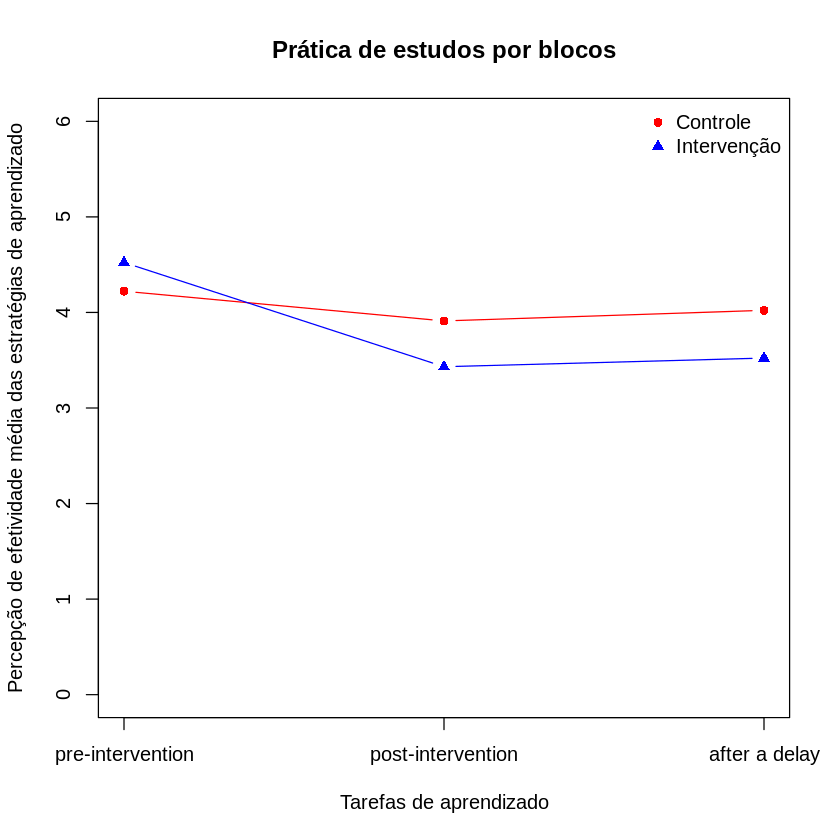

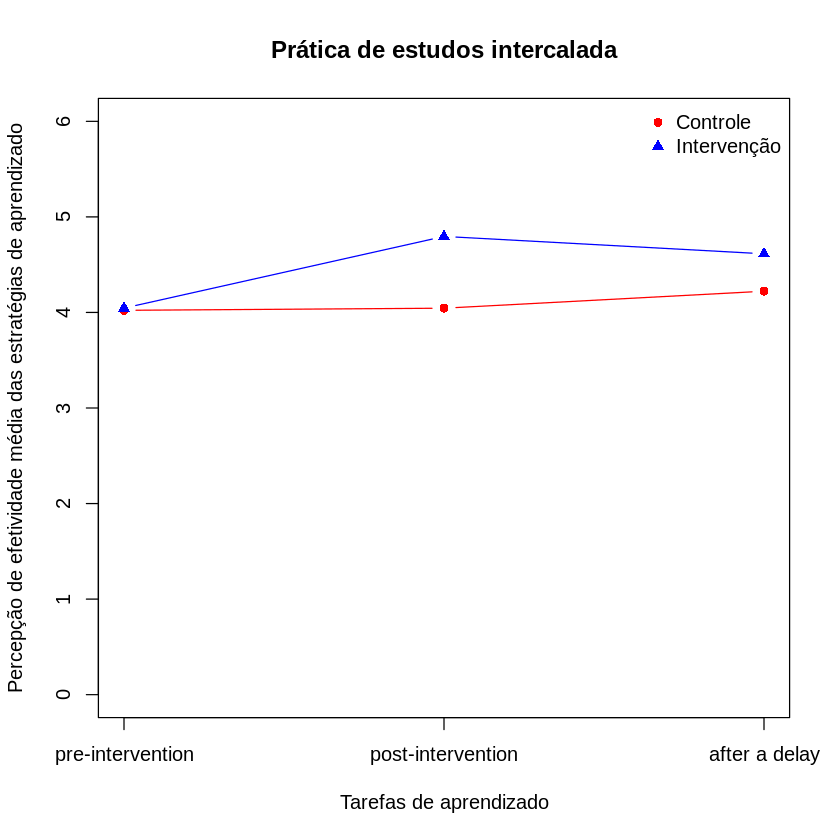

In [ ]:
# TODO: adicionar barra de erro

# Etapa 0: Definir ordem correta dos níveis
dados_ANOVA_RQ1$tempo <- factor(dados_ANOVA_RQ1$tempo, levels = c("pre-intervention", "post-intervention", "after a delay"))

# Etapa 1: Calcular médias por tempo
tempo_niveis <- levels(dados_ANOVA_RQ1$tempo)

media_blocked_control <- tapply(dados_ANOVA_RQ1$percep_blocked[dados_ANOVA_RQ1$condicao == "Control"],
                                dados_ANOVA_RQ1$tempo[dados_ANOVA_RQ1$condicao == "Control"], mean)

media_blocked_interv <- tapply(dados_ANOVA_RQ1$percep_blocked[dados_ANOVA_RQ1$condicao == "Full"],
                               dados_ANOVA_RQ1$tempo[dados_ANOVA_RQ1$condicao == "Full"], mean)

media_interleaved_control <- tapply(dados_ANOVA_RQ1$percep_interleaved[dados_ANOVA_RQ1$condicao == "Control"],
                                    dados_ANOVA_RQ1$tempo[dados_ANOVA_RQ1$condicao == "Control"], mean)

media_interleaved_interv <- tapply(dados_ANOVA_RQ1$percep_interleaved[dados_ANOVA_RQ1$condicao == "Full"],
                                   dados_ANOVA_RQ1$tempo[dados_ANOVA_RQ1$condicao == "Full"], mean)

# Etapa 2: Transformar nomes dos níveis em posições no eixo x
x <- 1:length(tempo_niveis)

# Etapa 3: Plot dos gráficos

# Gráfico 1: Prática por Bloco
plot(x, media_blocked_control, type = "b", pch = 16, col = "red",
     ylim = c(0, 6), xaxt = "n", xlab = "Tarefas de aprendizado", ylab = "Percepção de efetividade média das estratégias de aprendizado",
     main = "Prática de estudos por blocos")
lines(x, media_blocked_interv, type = "b", pch = 17, col = "blue")
axis(1, at = x, labels = tempo_niveis)
legend("topright", legend = c("Controle", "Intervenção"), col = c("red", "blue"),
       pch = c(16, 17), bty = "n")

# Gráfico 2: Prática Intercalada
plot(x, media_interleaved_control, type = "b", pch = 16, col = "red",
     ylim = c(0, 6), xaxt = "n", xlab = "Tarefas de aprendizado", ylab = "Percepção de efetividade média das estratégias de aprendizado",
     main = "Prática de estudos intercalada")
lines(x, media_interleaved_interv, type = "b", pch = 17, col = "blue")
axis(1, at = x, labels = tempo_niveis)
legend("topright", legend = c("Controle", "Intervenção"), col = c("red", "blue"),
       pch = c(16, 17), bty = "n")

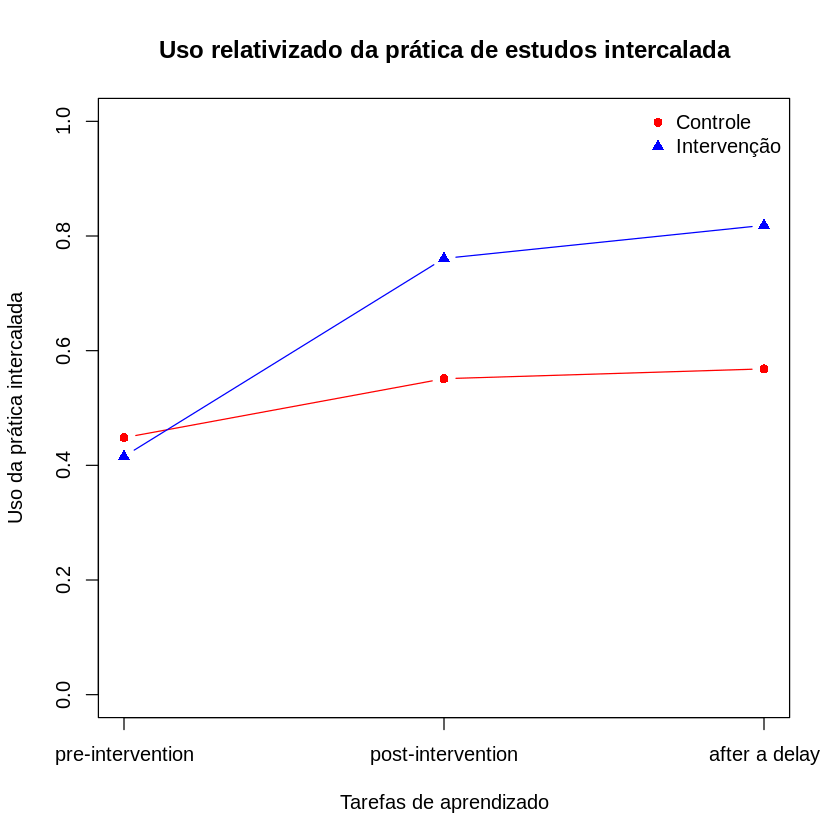

In [ ]:
# Etapa 0: Definir ordem correta dos níveis
dados_ANOVA_RQ2$tempo <- factor(dados_ANOVA_RQ2$tempo, levels = c("pre-intervention", "post-intervention", "after a delay"))

# Etapa 1: Calcular médias por tempo
tempo_niveis <- levels(dados_ANOVA_RQ2$tempo)

media_uso_interleaved_control <- tapply(dados_ANOVA_RQ2$proporcao_trocas[dados_ANOVA_RQ2$condicao == "Control"],
                                        dados_ANOVA_RQ2$tempo[dados_ANOVA_RQ2$condicao == "Control"], mean)

media_uso_interleaved_interv <- tapply(dados_ANOVA_RQ2$proporcao_trocas[dados_ANOVA_RQ2$condicao == "Full"],
                                       dados_ANOVA_RQ2$tempo[dados_ANOVA_RQ2$condicao == "Full"], mean)

# Etapa 2: Transformar nomes dos níveis em posições no eixo x
x <- 1:length(tempo_niveis)

# Gráfico 1: Prática Intercalada
plot(x, media_uso_interleaved_control, type = "b", pch = 16, col = "red",
     ylim = c(0, 1), xaxt = "n", xlab = "Tarefas de aprendizado", ylab = "Uso da prática intercalada",
     main = "Uso relativizado da prática de estudos intercalada")
lines(x, media_uso_interleaved_interv, type = "b", pch = 17, col = "blue")
axis(1, at = x, labels = tempo_niveis)
legend("topright", legend = c("Controle", "Intervenção"), col = c("red", "blue"),
       pch = c(16, 17), bty = "n")